In [45]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import time

sys.path.insert(0, os.path.abspath('/Users/ToriBonidie/Desktop/research/packages/analog_stars/'))
from select_analogs import select_analogs
from analog_auto import analog_auto

In [46]:
#reading in the MW stars and Sgr stars dataframes
path = '/Users/ToriBonidie/Desktop/research/packages/analog_stars/'
MW_stars = pd.read_csv(path + 'MW_stars.csv')
sgr_stars = pd.read_csv(path + 'sgr_stars.csv')

#reading in a file containing the mean and standard deviation of the three parameters
sgr_stats = pd.read_csv(path + 'sgr_stats.csv', header=0, index_col = 0)

/Users/ToriBonidie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
# this probably isn't very efficient lol and it takes a while
start_time = time.time()
match_params = ['[Fe/H]', 'Teff', 'log(g)']
for n in range(len(sgr_stars)):
    analog_idx = select_analogs(MW_stars, sgr_stars, sgr_stats, n_star = n, max_sigma=1, n_neighbors=20, n_analogs=100, params = match_params)      
    for i, index in enumerate(analog_idx[0]):
        # If for the first twin of the first planet cand, initiate the dataframe
        if (n == 0) and (i == 0):
            twins = MW_stars[index:index+1]
        else:
            twins = pd.concat([twins, MW_stars[index:index+1]])
end_time = time.time()
print('elapsed time: ' + str(round(float((end_time - start_time)/60), 3)) + ' minutes')


elapsed time: 5.131 minutes


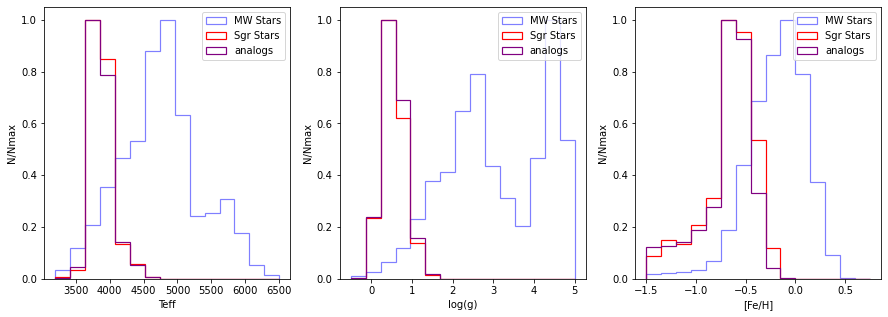

In [61]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

teff_bins = np.linspace(3200, 6500, 16)
logg_bins = np.linspace(-0.5, 5, 16)
feh_bins = np.linspace(-1.5, 0.75, 16)
  
teff_hist1, _ = np.histogram(MW_stars['Teff'], teff_bins)
teff_hist2, _ = np.histogram(sgr_stars['Teff'], teff_bins)
teff_hist3, _ = np.histogram(twins['Teff'], teff_bins)
logg_hist1, _ = np.histogram(MW_stars['log(g)'], logg_bins)
logg_hist2, _ = np.histogram(sgr_stars['log(g)'], logg_bins)
logg_hist3, _ = np.histogram(twins['log(g)'], logg_bins)
feh_hist1, _ = np.histogram(MW_stars['[Fe/H]'], feh_bins)
feh_hist2, _ = np.histogram(sgr_stars['[Fe/H]'], feh_bins)
feh_hist3, _ = np.histogram(twins['[Fe/H]'], feh_bins)
  
teff_ws1 = np.ones(len(MW_stars['Teff']))/float(np.max(teff_hist1))
teff_ws2 = np.ones(len(sgr_stars['Teff']))/float(np.max(teff_hist2))
teff_ws3 = np.ones(len(twins['Teff']))/float(np.max(teff_hist3))
logg_ws1 = np.ones(len(MW_stars['log(g)']))/float(np.max(logg_hist1))
logg_ws2 = np.ones(len(sgr_stars['log(g)']))/float(np.max(logg_hist2))
logg_ws3 = np.ones(len(twins['log(g)']))/float(np.max(logg_hist3))
feh_ws1 = np.ones(len(MW_stars['[Fe/H]']))/float(np.max(feh_hist1))
feh_ws2 = np.ones(len(sgr_stars['[Fe/H]']))/float(np.max(feh_hist2))
feh_ws3 = np.ones(len(twins['[Fe/H]']))/float(np.max(feh_hist3))


ax[0].hist(MW_stars['Teff'], bins=teff_bins, weights=teff_ws1, histtype='step', color='blue', alpha = 0.5, linewidth=1.2, label = 'MW Stars')
ax[0].hist(sgr_stars['Teff'], bins=teff_bins, weights=teff_ws2,histtype='step', color='red', linewidth=1.2, label = 'Sgr Stars')
ax[0].hist(twins['Teff'], bins=teff_bins, weights=teff_ws3,histtype='step', color='purple', linewidth=1.2, label = 'analogs')

ax[1].hist(MW_stars['log(g)'], bins=logg_bins, weights=logg_ws1, histtype='step', color='blue', alpha = 0.5, linewidth=1.2, label = 'MW Stars')
ax[1].hist(sgr_stars['log(g)'], bins=logg_bins, weights=logg_ws2,histtype='step', color='red', linewidth=1.2, label = 'Sgr Stars')
ax[1].hist(twins['log(g)'], bins=logg_bins, weights=logg_ws3,histtype='step', color='purple', linewidth=1.2, label = 'analogs')


ax[2].hist(MW_stars['[Fe/H]'], bins=feh_bins, weights=feh_ws1, histtype='step', color='blue', alpha = 0.5, linewidth=1.2, label = 'MW Stars')
ax[2].hist(sgr_stars['[Fe/H]'], bins=feh_bins, weights=feh_ws2,histtype='step', color='red', linewidth=1.2, label = 'Sgr Stars')
ax[2].hist(twins['[Fe/H]'], bins=feh_bins, weights=feh_ws3,histtype='step', color='purple', linewidth=1.2, label = 'analogs')


ax[0].set_xlabel('Teff')
ax[1].set_xlabel('log(g)')
ax[2].set_xlabel('[Fe/H]')
ax[0].set_ylabel('N/Nmax')
ax[1].set_ylabel('N/Nmax')
ax[2].set_ylabel('N/Nmax')
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
